# MNIST demo

shape = (1797, 64)
label: [0 1 2 3 4 5 6 7 8 9]
Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)
Epoch: 0, Loss_Train: 2.417731285095215, Loss_Test: 2.4173619747161865
Epoch: 100, Loss_Train: 1.6464290618896484, Loss_Test: 1.6794593334197998
Epoch: 200, Loss_Train: 0.791996419429779, Loss_Test: 0.8279338479042053
Epoch: 300, Loss_Train: 0.38772231340408325, Loss_Test: 0.4337557256221771
Epoch: 400, Loss_Train: 0.2510850727558136, Loss_Test: 0.3191624581813812
Epoch: 500, Loss_Train: 0.18449866771697998, Loss_Test: 0.27028220891952515
Epoch: 600, Loss_Train: 0.1448153853416443, Loss_Test: 0.24135060608386993
Epoch: 700, Loss_Train: 0.11884115636348724, Loss_Test: 0.22115780413150787
Epoch: 800, Loss_Train: 0.10045100748538971, Loss_Test: 0.20623163878917694
Epoch: 900, Loss_Train: 0.0866774469614029, Loss_Test: 0.194694638

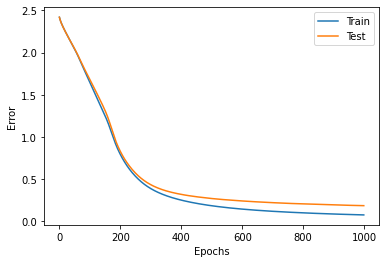

correct rate: 94.44444444444444%
type <class 'numpy.ndarray'>


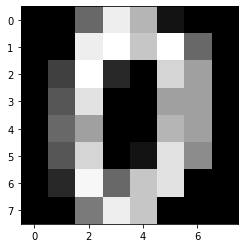

answer: 0, prediction: 0


In [2]:
from typing import List

import matplotlib.pyplot as plt
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
# import numpy as np
from torch import nn, optim

digits_data = datasets.load_digits()

n_img = 10
# plt.figure(figsize=(10, 4))
# for i in range(n_img):
#    ax = plt.subplot(2, 5, i + 1)
#    plt.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
# plt.show()

print(f"shape = {digits_data.data.shape}")
print(f"label: {digits_data.target[:n_img]}")


digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)


net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)
print(net)

loss_fnc = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.01)

record_loss_train: List[float] = []
record_loss_test: List[float] = []

epochs = 1000

for i in range(epochs):
    optimizer.zero_grad()

    y_train = net(x_train)
    y_test = net(x_test)

    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    loss_train.backward()

    optimizer.step()

    if i % 100 == 0:
        print(f"Epoch: {i}, Loss_Train: {loss_train}, Loss_Test: {loss_test}")

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print(f"correct rate: {count/len(y_test)*100}%")

img_id = 0
x_pred = digit_images[img_id]
print("type", type(x_pred))
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print(f"answer: {labels[img_id]}, prediction: {y_pred.argmax().item()}")